# 2.5.1 Regular Expression Basic

- ### Introduction

正则表达式的功能强大，但语法复杂。

不用期望记住所有的语法，最重要的是理解核心原理, 什么是可能的, 以及哪里去查找细节. This will mean you can quickly jog your memory whenever you need regular expressions.

我们将通过对Hacker News提交的数据集的分析，学习正则表达式

The columns in the dataset are explained below:

- `id`: The unique identifier from Hacker News for the story
- `title`: The title of the story
- `url`: The URL that the stories links to, if the story has a URL
- `num_points`: The number of points the story acquired, calculated as the total number of upvotes minus the total number of downvotes
- `num_comments`: The number of comments that were made on the story
- `author`: The username of the person who submitted the story
- `created_at`: The date and time at which the story was submitted

In [1]:
import pandas as pd
hn = pd.read_csv('hacker_news.csv')

In [2]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48


- ### The Regular Expression Module

在使用正则表达式时，我们使用术语**pattern**来描述我们编写的正则表达式。 

如果该pattern在我们正在搜索的字符串中被找到，我们说 pattern被**matched**（匹配到）了。

如之前学过的，字母和数字在正则表达式中进表示它们本身。 例如 若要在一组字符串中找到字符串`"and"`,正则表达式的pattern就是简单的 `and`:

![basic_match_1](basic_match_1.svg)

我们以前将正则表达式与pandas一起使用，但是Python还为正则表达式提供了一个内置模块：[re module](https://docs.python.org/3/library/re.html#module-re). 此模块包含许多用于处理正则表达式的不同函数和类。 

`re`模块中最有用的函数之一是[re.search()](https://docs.python.org/3/library/re.html#re.search)函数，该函数带有两个必需的参数：

- The regex pattern
- The string we want to search that pattern for

In [3]:
import re

m = re.search("and", "hand")
print(m)

<re.Match object; span=(1, 4), match='and'>


In [4]:
"hand"[1:4]

'and'

如果pattern在string里被找到，`re.search()`会返回一个[Match 对象](https://docs.python.org/3/library/re.html#match-objects).

如果 pattern 没被找到, `re.search()` 返回 `None`:

In [5]:
m = re.search("and", "antidote")
print(m)

None


**`Match`对象 always have a boolean value of `True`.**

**`None`对象 always have a boolean value of `False`.**

利用这一事实，可以轻易地检测我们的regex是否与list中的各个字符串匹配

In [6]:
string_list = ["Julie's favorite color is Blue.",
               "Keli's favorite color is Green.",
               "Craig's favorite colors are blue and red."]  # 第一行的 Blue为大写，第三行的 blue为小写

pattern = "Blue"

for s in string_list:
    if re.search(pattern, s):
        print("Match")
    else:
        print("No Match")

Match
No Match
No Match


So far, we haven't done anything with regular expressions that we couldn't do using the `in` keyword. The power of regular expressions comes when we use one of the special character sequences.

The first of these we'll learn is called a **set**. A set allows us to specify two or more characters that can match in a single character's position.

We define a set by placing the characters we want to match for in square brackets:

![set_syntax_breakdown](set_syntax_breakdown.svg)

The regular expression above will match the strings `mend`, `send`, and `bend`.

![basic_match_2](basic_match_2.svg)

我们将使用这种技术来找出在Hacker News数据集的故事标题中提到Python的次数。 我们将使用一个集合来检查大写字母'P'的`Python`和小写字母'p'的`python`。

In [7]:
# 把所有的title提取到一个list
titles = hn["title"].tolist()

python_mentions = 0
pattern = '[Pp]ython'

for s in titles:
    if re.search(pattern, s):
        python_mentions += 1

python_mentions

160

- ### Counting Matches with pandas Methods

`Series.str.contains()`返回的结果是一个布尔掩码: a series of `True`/`False` values.

这意味着可以简单地用`Series.sum()`直接计算出匹配成功的次数

In [8]:
pattern = '[Pp]ython'
titles = hn['title']
titles.str.contains(pattern).sum()

160

- ###  Using Regular Expressions to Select Data

In [9]:
py_titles_bool = titles.str.contains("[Pp]ython")
py_titles = titles[py_titles_bool]
py_titles.head()

102                  From Python to Lua: Why We Switched
103            Ubuntu 16.04 LTS to Ship Without Python 2
144    Create a GUI Application Using Qt and Python i...
196    How I Solved GCHQ's Xmas Card with Python and ...
436    Unikernel Power Comes to Java, Node.js, Go, an...
Name: title, dtype: object

也可在一行中完成：

In [10]:
py_titles = titles[titles.str.contains("[Pp]ython")]
py_titles.head()

102                  From Python to Lua: Why We Switched
103            Ubuntu 16.04 LTS to Ship Without Python 2
144    Create a GUI Application Using Qt and Python i...
196    How I Solved GCHQ's Xmas Card with Python and ...
436    Unikernel Power Comes to Java, Node.js, Go, an...
Name: title, dtype: object

- ### Quantifiers

用`{}`表示字符重复的次数，例如要表示`1000`到`2999`：

![quantifier_example](quantifier_example.svg)

这中类型的正则表达式语法被称为**quantifier**

以上看到的quantifier类型为numberic quantifier，以下为一些其他numberic quantifier类型：

![quantifiers_numeric](quantifiers_numeric.svg)

一些其他quantifier：

![quantifiers_other](quantifiers_other.svg)

find how many titles in our dataset mention `email` or `e-mail`.

In [11]:
email_bool = titles.str.contains("e-?mail")
# 等价于：
# email_bool = titles.str.contains('(e)(-)?(mail)')
email_count = email_bool.sum()
titles[email_bool].head()

119     Show HN: Send an email from your shell to your...
313         Disposable emails for safe spam free shopping
1361    Ask HN: Doing cold emails? helps us prove this...
1750    Protect yourself from spam, bots and phishing ...
2421                   Ashley Madison hack treating email
Name: title, dtype: object

- ###  Character Classes

假如想要匹配带标签的字符串，如 `[pdf]`, `[vedio]`等，使用`[pdf]`或`[vedio]`就不行了，因为中括号将会被看做一个set。

想要匹配`[pdf]`，我们可以使用反斜杠 来escape（转义）方括号：`\[pdf\]`

![escaped_character_syntax_breakdown](escaped_character_syntax_breakdown.svg)

另一个问题是，匹配标签时，我们并不知道标签的内容，即不知道方括号中有什么。

想要使用正则表达式匹配未知字符，需要使用**character classes**（字符类）

一些字符类：

![character_classes_v2_1](character_classes_v2_1.svg)

从上图可以看出：
1. Ranges可以用于字符和数字.
2. Sets 和 ranges 可以组合在一起使用.

其他一些字符类：

![character_classes_v2_2](character_classes_v2_2.svg)

The one that we'll be using to match characters in tags is `\w`, which represents any number or letter. Each character class represents a single character, so to match multiple characters (e.g. words like `video` and `pdf`), we'll need to combine them with quantifiers.

In order to match word characters between our brackets, we can combine the word character class (`\w`) with the 'one or more' quantifier (`+`), giving us a combined pattern of `\w+`.

This will match sequences like `pdf`, `video`, `Python`, and `2018` but won't match a sequence containing a space or punctuation character like `PHP-DEV` or `XKCD Flowchart`. If we wanted to match those tags as well, we could use `.+`; however, in this case, we're just interested in single-word tags without special characters.

匹配带有标签的title：

In [12]:
pattern = "\[\w+\]"
tag_titles = titles[titles.str.contains(pattern)]
tag_titles

66       Analysis of 114 propaganda sources from ISIS, ...
100      Munich Gunman Got Weapon from the Darknet [Ger...
159           File indexing and searching for Plan 9 [pdf]
162      Attack on Kunduz Trauma Centre, Afghanistan  I...
195                 [Beta] Speedtest.net  HTML5 Speed Test
                               ...                        
19763    TSA can now force you to go through body scann...
19867                       Using Pony for Fintech [video]
19947                                Swift Reversing [pdf]
19979    WSJ/Dowjones Announce Unauthorized Access Betw...
20089    Users Really Do Plug in USB Drives They Find [...
Name: title, Length: 444, dtype: object

In [13]:
tag_titles.shape[0]

444

- ### Accessing the Matching Text with Capture Groups

在Python中，反斜杠后跟某些字符代表escape sequence(转义序列)- 如`\n`序列代表换行符。

![escape_sequences](escape_sequences.png)

这些转义序列可能对我们的正则表达式造成意想不到的后果。 让我们看一下包含子字符串`\b`的字符串：

In [14]:
print('hello\b world')

hello world


`\b`表示退格键，所以`o`被移除了。

字符序列`\b`在正则表达式中有特殊含义，因此我们需要一种无需触发转义序列即可编写这些字符的方法。

一种方法是在`b`前再加一个反斜杠

In [15]:
print('hello\\b world')

hello\b world


但是这种方法使正则表达式变得难读，所以我们可以使用[raw string](https://docs.python.org/3/reference/lexical_analysis.html#grammar-token-stringprefix)，也就是在字符串前加一个`r`

In [16]:
print(r'hello\b world')

hello\b world


raw string 不会影响正则表达式中的特殊序列，如`\w`,`\d`等，

仅会影响转义序列，如`\n`,`\b`

**capture groups**（捕获组）允许我们在匹配里指定一个或多个可以单独访问的组

![tags_syntax_breakdown_v2](tags_syntax_breakdown_v2.svg)

假设想知道`title`里都有哪些标签，捕获组就能排上用场了：

In [17]:
tag_5 = tag_titles.head()
pattern = r"(\[\w+\])"
tag_5_matches = tag_5.str.extract(pattern)
print(tag_5_matches)

            0
66      [pdf]
100  [German]
159     [pdf]
162     [pdf]
195    [Beta]


把括号移到方括号内：

In [18]:
pattern = r"\[(\w+)\]"
tag_5_matches = tag_5.str.extract(pattern, expand=False)
print(tag_5_matches)

66        pdf
100    German
159       pdf
162       pdf
195      Beta
Name: title, dtype: object


Note that we specify `expand=False` with the `Series.str.extract()` method to *return a series*.

In [19]:
tag_5_matches.value_counts()

pdf       3
German    1
Beta      1
Name: title, dtype: int64

---
`re.search().group()`可以返回查询到的结果：

In [20]:
string = tag_5[66]
re.search(r"\[(\w+)\]", string)

<re.Match object; span=(72, 77), match='[pdf]'>

In [21]:
re.search(r"\[(\w+)\]", string).group()

'[pdf]'

---
- ### Negative Character Classes

正则表达式通常很复杂。创建复杂的正则表达式时，通常需要多次尝试，以便找到与pattern匹配‘不好的’实例，然后将其排除。

为了更快地构建正则表达式，创建返回前几个匹配字符串的函数可能会有所帮助：

In [22]:
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

另一个有用的方法是使用[RegExr](https://regexr.com)这样的在线工具，该工具可让您构建正则表达式，并包括语法突出显示，即时匹配和regex语法参考。 

找到含有`java`的title

In [23]:
first_10_matches(r"[Jj]ava")

267      Show HN: Hire JavaScript - Top JavaScript Talent
436     Unikernel Power Comes to Java, Node.js, Go, an...
580     Python integration for the Duktape Javascript ...
811     Ask HN: Are there any projects or compilers wh...
1023                         Pippo  Web framework in Java
1046    If you write JavaScript tools or libraries, bu...
1093    Rollup.js: A next-generation JavaScript module...
1162                 V8 JavaScript Engine: V8 Release 5.4
1195                   Proposed JavaScript Standard Style
1314           Show HN: Design by Contract for JavaScript
Name: title, dtype: object

We can see that there are a number of matches that contain `Java` as part of the word `JavaScript`. 

若想排除`JavaScript`，我们可以使用**negative character classes**

![negative_character_classes](negative_character_classes.svg)

In [24]:
first_10_matches(r'[Jj]ava[^Ss]')

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1840                    Adopting RxJava on the Airbnb App
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
2367    Code that is valid in both PHP and Java, and p...
2493    Ask HN: I've been a java dev for a couple of y...
2751                Eventsourcing for Java 0.4.0 released
2910                2016 JavaOne Intel Keynote  32mn Talk
3452    What are the Differences Between Java Platform...
Name: title, dtype: object

In [25]:
first_10_matches(r'[Jj]ava\W')

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1840                    Adopting RxJava on the Airbnb App
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
2367    Code that is valid in both PHP and Java, and p...
2493    Ask HN: I've been a java dev for a couple of y...
2751                Eventsourcing for Java 0.4.0 released
3452    What are the Differences Between Java Platform...
4273     Ask HN: Is Bloch's Effective Java Still Current?
Name: title, dtype: object

- ### Word Boundaries

以上方法有个副作用，当`Java`出现在字符串的最后时

`Pippo  Web framework in Java`

就匹配不到了

这是因为`[^Ss]`或`\W`必须匹配一个字符，字符串的结尾没有字符，所以不会被匹配

对此，我们需要使用**word boundary anchor**，`\b`, word boundary匹配单词字符和非单词字符之间的位置，或者单词字符与字符串的开头/结尾之间的位置。 下图显示了示例字符串中的所有单词边界：

![word_boundaries](word_boundaries.svg)

In [26]:
# 'java'前后都要添加 word boundary，这样可以避免匹配到如 ’RxJava' 这样的字符串
java_titles = titles[titles.str.contains(r'\b[Jj]ava\b')]
java_titles.head()

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1023                         Pippo  Web framework in Java
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
Name: title, dtype: object

- ### Matching at the Start and End of Strings

We learned that the **word boundary anchor** matches the space between a word character and a non-word character. More generally in regular expressions, an **anchor** matches something that isn't a character, as opposed to character classes which match specific characters.

除了word boundary anchor外, the other two most common anchors are the **beginning anchor** and the **end anchor**, which represent the start and the end of the string.

![positional_anchors](positional_anchors.svg)

注意`^`既用于negative set，也用于beginning anchor，区别是前面的字符是否为`[`

Let's use the beginning and end anchors to count how many titles have tags at the start versus the end of the story title in our Hacker News dataset.

In [27]:
beginning_count = titles.str.contains(r'^\[\w+\]').sum()
ending_count = titles.str.contains(r'\[\w+\]$').sum()
print(beginning_count)
print(ending_count)

15
417


- ###  Using Flags to Modify Regex Patterns

`re.search()`和pandas里的正则表达式方法都接收`flags`参数，该参数接受一个或多个flag

A [list of all available flags](https://docs.python.org/3/library/re.html#re.A) is in the documentation, but by far the most common and the most useful is the [re.IGNORECASE](https://docs.python.org/3/library/re.html#re.I) flag（忽略大小写）, which is also available using the alias `re.I` for convenience.

In [28]:
email_tests = pd.Series(['email', 'Email', 'eMail', 'EMAIL', 'e-mail'])
email_tests.str.contains(r"email")

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [29]:
email_tests.str.contains(r"email",flags=re.I)

0     True
1     True
2     True
3     True
4    False
dtype: bool

In [30]:
email_tests = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail',
              'e-mail', 'eMail', 'E-Mail', 'EMAIL', 'emails', 'Emails',
              'E-Mails'])

In [31]:
titles.str.contains(r"\be[- ]?mails?\b",flags=re.I).sum()

141

# 2.5.2 Advanced Regular Expressions

- ### Capture Groups

![single_capture_group](single_capture_group.svg)

In [32]:
pattern = r"(\w+SQL)"
sql_flavors = titles.str.extract(pattern, flags=re.I, expand=False)
sql_flavors_freq = sql_flavors.value_counts()
print(sql_flavors_freq)

PostgreSQL    27
NoSQL         16
MySQL         12
nosql          1
mySql          1
CloudSQL       1
MemSQL         1
SparkSQL       1
Name: title, dtype: int64


nosql 和 NoSQL 是一样的，属于重复项

在本练习中，我们将把对不同SQL风格的提及提取到新列中，并通过将它们全部变为小写来清除这些重复项。 然后，我们将分析结果以查看每种口味的平均评论数。

In [33]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()
hn_sql['flavor'] = hn_sql['title'].str.extract(r'(\w+sql)', flags = re.I, expand=False).str.lower()
sql_pivot = hn_sql.pivot_table(index='flavor', values='num_comments')
sql_pivot

,num_comments
flavor,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


- ### Using Capture Groups to Extract Data

Let's look at a sample of Hacker News titles that mention Python:

```
Developing a computational pipeline using the asyncio module in Python 3
Python 3 on Google App Engine flexible environment now in beta
Python 3.6 proposal, PEP 525: Asynchronous Generators
How async/await works in Python 3.5.0
Ubuntu Drops Python 2.7 from the Default Install in 16.04
Show HN: First Release of Transcrypt Python3.5 to JavaScript Compiler
```

这些 "Python" 后都跟着一个表示版本号的数字。有时带空格，有时不带。我们可以用以下正则表达式匹配这个案例：

![python_versions_fixed](python_versions_fixed.svg)

注意`[\d.]`有方括号，表示`\d`或`.`中的一个

In [34]:
pattern = r'[Pp]ython ?([\d.]+)'  # 这里的 . 被转义了？
py_versions_freq = dict(titles.str.extract(pattern, expand=False).value_counts())
py_versions_freq

{'3': 10,
 '3.5': 4,
 '2': 3,
 '3.6': 2,
 '4': 2,
 '2.7': 1,
 '3.5.0': 1,
 '8': 1,
 '1.5': 1}

用[dict()](https://docs.python.org/3.7/library/stdtypes.html#dict)函数，转化为字典

- ### Counting Mentions of the 'C' Language

![c_regex_1](c_regex_1.svg)

In [35]:
first_10_matches(r"\b[Cc]\b")

13                 Custom Deleters for C++ Smart Pointers
220                        Lisp, C++: Sadness in my heart
221                  MemSQL (YC W11) Raises $36M Series C
353     VW C.E.O. Personally Apologized to President O...
365                      The new C standards are worth it
444           Moz raises $10m Series C from Foundry Group
508     BDE 3.0 (Bloomberg's core C++ library): Open S...
521          Fuchsia: Micro kernel written in C by Google
549     How to Become a C.E.O.? The Quickest Path Is a...
1282    A lightweight C++ signals and slots implementa...
Name: title, dtype: object

- C++不是c语言
- 匹配了无关字符串`C.E.O`

In [36]:
pattern = r"\b[Cc]\b[^.+]"

first_10_matches(pattern)

365                      The new C standards are worth it
444           Moz raises $10m Series C from Foundry Group
521          Fuchsia: Micro kernel written in C by Google
1307            Show HN: Yupp, yet another C preprocessor
1326                     The C standard formalized in Coq
1365                          GNU C Library 2.23 released
1429    Cysignals: signal handling (SIGINT, SIGSEGV, )...
1620                        SDCC  Small Device C Compiler
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2195    MyHTML  HTML Parser on Pure C with POSIX Threa...
Name: title, dtype: object

注意： `\b`匹配的是word boundary，即字符与非字符之间的位置，**并不是非字符本身**，

所以`\b[Cc]\b[^.+]`中`\b`和`[^.+]`指的不是同一位置，

所以该正则表达式表示的是 *c + 字符与非字符的位置 + 任意个非字母或非数字 （或者是非 "."和非 "+"?)*

- ### Using Lookarounds to Control Matches Based on Surrounding Text

以上10行匹配只得到了一个不相关的结果，即“Series C”，该术语用于表示特定类型的初创企业筹款。

此外，由于`\b`后又加了个`[^.+]`，如果c出现在行的**末尾**，就匹配不到了。

这两种情况无法用negative set解决，需要引入一个新的工具：**lookarounds**

lookarounds可以让我们定义一个字符或一个字符序列，这些字符或字符序列must或must not出现在正则表达式匹配之前或之后。

即有四种类型：

![lookarounds](lookarounds.svg)

In [37]:
print(None or '这种情况不会打印None')

这种情况不会打印None


In [38]:
pattern = r"(?<!Series\s)\b[Cc]\b((?![+.])|\.$)"
first_10_matches(pattern)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


365                      The new C standards are worth it
521          Fuchsia: Micro kernel written in C by Google
1307            Show HN: Yupp, yet another C preprocessor
1326                     The C standard formalized in Coq
1365                          GNU C Library 2.23 released
1429    Cysignals: signal handling (SIGINT, SIGSEGV, )...
1620                        SDCC  Small Device C Compiler
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2195    MyHTML  HTML Parser on Pure C with POSIX Threa...
2589    Phalcon  PHP framework delivered as a C extension
Name: title, dtype: object

- ### BackReferences: Using Capture Groups in a RegEx Pattern

假设我们要标识包含双字母单词的字符串，例如“ feed”中的“ ee”。 因为我们不提前知道会重复哪些字母，所以我们需要一种方法来指定捕获组然后重复它。 我们可以使用**BackReferences**（反向引用）来做到这一点。

![backreference_syntax_2](backreference_syntax_2.svg)

In [39]:
test_cases = [
              "I'm going to read a book.",
              "Green is my favorite color.",
              "My name is Aaron.",
              "No doubles here.",
              "I have a pet eel."
             ]

for tc in test_cases:
    print(re.search(r"(\w)\1", tc))

<re.Match object; span=(21, 23), match='oo'>
<re.Match object; span=(2, 4), match='ee'>
None
None
<re.Match object; span=(13, 15), match='ee'>


大小写敏感，没有匹配`Aaron`，尽管有两个a

In [40]:
for tc in test_cases:
    print(re.search(r"(\w)(\w)", tc))  # 该方法显然不行

<re.Match object; span=(4, 6), match='go'>
<re.Match object; span=(0, 2), match='Gr'>
<re.Match object; span=(0, 2), match='My'>
<re.Match object; span=(0, 2), match='No'>
<re.Match object; span=(2, 4), match='ha'>


提取带有重复单词的title：

In [41]:
pattern = r'\b(\w+)\s\1\b'
titles[titles.str.contains(pattern)].head(10)

3102                  Silicon Valley Has a Problem Problem
3176                Wire Wire: A West African Cyber Threat
3178                         Flexbox Cheatsheet Cheatsheet
4797                            The Mindset Mindset (2015)
7276     Valentine's Day Special: Bye Bye Tinder, Flirt...
10371    Mcdonalds copying cyriak  cows cows cows in th...
11575                                    Bang Bang Control
11901          Cordless Telephones: Bye Bye Privacy (1991)
12697          Solving the the Monty-Hall-Problem in Swift
15049    Bye Bye Webrtc2SIP: WebRTC with Asterisk and A...
Name: title, dtype: object

- ### Substituting Regular Expression Matches

我们之前使用了`str.replace()`方法来替换简单的子字符串。 我们可以使用[re.sub()](https://docs.python.org/3/library/re.html#re.sub)函数使用正则表达式实现相同的目的。 `re.sub()`的基本语法为：

`re.sub(pattern, repl, string, flags=0)`

`repl`参数是你想替换的文本，一个简单的例子：

In [42]:
string = "aBcDEfGHIj"

# 把所有大写字母替换为 “-”
print(re.sub(r"[A-Z]", "-", string))

a-c--f---j


用pandas时，我们也可以用`Series.str.replace()`，语法和`re.sub()`类似：

`Series.str.replace(pat, repl, flags=0)`

In [43]:
sql_variations = pd.Series(["SQL", "Sql", "sql"])

sql_uniform = sql_variations.str.replace(r"sql", "SQL", flags=re.I)
print(sql_uniform)

0    SQL
1    SQL
2    SQL
dtype: object


In [44]:
email_variations = pd.Series(['email', 'Email', 'e Mail',
                        'e mail', 'E-mail', 'e-mail',
                        'eMail', 'E-Mail', 'EMAIL'])

pattern = r"\be[-\s]?mail"
email_uniform = email_variations.str.replace(pattern, "email", flags=re.I)
email_uniform

0    email
1    email
2    email
3    email
4    email
5    email
6    email
7    email
8    email
dtype: object

In [45]:
titles_clean = titles.str.replace(pattern, "email", flags=re.I)
titles_clean

0                                Interactive Dynamic Video
1        Florida DJs May Face Felony for April Fools' W...
2             Technology ventures: From Idea to Enterprise
3        Note by Note: The Making of Steinway L1037 (2007)
4        Title II kills investment? Comcast and other I...
                               ...                        
20094    How Purism Avoids Intels Active Management Tec...
20095            YC Application Translated and Broken Down
20096    Microkernels are slow and Elvis didn't do no d...
20097                        How Product Hunt really works
20098    RoboBrowser: Your friendly neighborhood web sc...
Name: title, Length: 20099, dtype: object

- ### Extracting Domains from URLs

我们将提取URL的不同组成部分以对其进行分析。我们将从仅提取域开始。 

以下是数据集中某些URL的列表，其中的域以彩色突出显示，因此您可以看到我们要捕获的字符串部分。

![url_examples_1_updated](url_examples_1_updated.svg)

In [46]:
test_urls = pd.Series([
 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 'http://www.interactivedynamicvideo.com/',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 'http://evonomics.com/advertising-cannot-maintain-internet-heres-solution/',
 'HTTPS://github.com/keppel/pinn',
 'Http://phys.org/news/2015-09-scale-solar-youve.html',
 'https://iot.seeed.cc',
 'http://www.bfilipek.com/2016/04/custom-deleters-for-c-smart-pointers.html',
 'http://beta.crowdfireapp.com/?beta=agnipath',
 'https://www.valid.ly?param',
 'http://css-cursor.techstream.org'
])

pattern = r"https?://([\w\-\.]+)"

test_urls.str.extract(pattern, flags=re.I)

,0
0,www.amazon.com
1,www.interactivedynamicvideo.com
2,www.nytimes.com
3,evonomics.com
4,github.com
5,phys.org
6,iot.seeed.cc
7,www.bfilipek.com
8,beta.crowdfireapp.com
9,www.valid.ly


In [47]:
domains = hn['url'].str.extract(pattern, flags=re.I, expand=False)
domains.value_counts().head()

github.com             1008
medium.com              825
www.nytimes.com         525
www.theguardian.com     248
techcrunch.com          245
Name: url, dtype: int64

- ### Extracting URL Parts Using Multiple Capture Groups

![url_examples_2_updated](url_examples_2_updated.svg)

In [48]:
pattern = r'(https?)://([\w\-\.]+)/?(.+)?'
test_urls.str.extract(pattern, flags=re.I)

,0,1,2
0,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
1,http,www.interactivedynamicvideo.com,NaN
2,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
3,http,evonomics.com,advertising-cannot-maintain-internet-heres-sol...
4,HTTPS,github.com,keppel/pinn
5,Http,phys.org,news/2015-09-scale-solar-youve.html
6,https,iot.seeed.cc,NaN
7,http,www.bfilipek.com,2016/04/custom-deleters-for-c-smart-pointers.html
8,http,beta.crowdfireapp.com,?beta=agnipath
9,https,www.valid.ly,?param


In [49]:
pattern = r'(https?)://([\w\-\.]+)/?(.*)'  # 匹配不到时，用(.+)? 返回 NaN，用(.*)不返回
test_urls.str.extract(pattern, flags=re.I)

,0,1,2
0,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
1,http,www.interactivedynamicvideo.com,
2,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
3,http,evonomics.com,advertising-cannot-maintain-internet-heres-sol...
4,HTTPS,github.com,keppel/pinn
5,Http,phys.org,news/2015-09-scale-solar-youve.html
6,https,iot.seeed.cc,
7,http,www.bfilipek.com,2016/04/custom-deleters-for-c-smart-pointers.html
8,http,beta.crowdfireapp.com,?beta=agnipath
9,https,www.valid.ly,?param


In [50]:
url_parts = hn['url'].str.extract(pattern, flags=re.I)
url_parts.head()

,0,1,2
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...


- ### Using Named Capture Groups to Extract Data

`?P<Name>`

In [51]:
pattern = r"(?P<protocol>https?)://(?P<domain>[\w\.\-]+)/?(?P<path>.*)"

url_parts = hn['url'].str.extract(pattern, flags=re.I)
url_parts.head()

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...


# 2.5.3 List Comprehensions and Lambda Functions

- ### The JSON Format

在此任务中，我们将学习一些技巧和语法捷径，我们可以在所学到的一切之上使用这些技巧和语法捷径，包括：

- 创建 list comprehensions，用单行代码替换循环。
- 创建被称为 lambda函数 的一次性函数。

接下来用到的数据基于[JSON](https://www.json.org/json-en.html)格式，JSON是一种轻便的数据交互格式或语言，

JSON is built on two structures:

- A collection of name/value pairs. In various languages, this is realized as an *object, record, struct, dictionary, hash table, keyed list, or associative array*.
- An ordered list of values. In most languages, this is realized as an *array, vector, list, or sequence*.

从Python的角度来看，JSON可以看作是彼此嵌套的Python对象的集合。

|Python| JSON|
|------|-----|
|dict|object|
|list, tuple|array|
|str|string|
|int, float, int- & float-derived Enums|number|
|True|true|
|False|false|
|None|null|




![json](json.svg)

如上图的JSON是一个list，其中的每个元素是dictionary，每个dictionary又有一个list作为value

Python [json module](https://docs.python.org/3.7/library/json.html#module-json)包含许多函数，使使用JSON对象更加容易。我们可以使用[json.loads()](https://docs.python.org/3.7/library/json.html#json.loads)方法将字符串中包含的JSON数据转换为等效的Python对象集：

In [52]:
json_string = """
[
  {
    "name": "Sabine",
    "age": 36,
    "favorite_foods": ["Pumpkin", "Oatmeal"]
  },
  {
    "name": "Zoe",
    "age": 40,
    "favorite_foods": ["Chicken", "Pizza", "Chocolate"]
  },
  {
    "name": "Heidi",
    "age": 40,
    "favorite_foods": ["Caesar Salad"]
  }
]
"""

import json
json_obj = json.loads(json_string)
print(type(json_obj))

<class 'list'>


可以看到`json_string`被转化为list了

In [53]:
json_obj

[{'name': 'Sabine', 'age': 36, 'favorite_foods': ['Pumpkin', 'Oatmeal']},
 {'name': 'Zoe',
  'age': 40,
  'favorite_foods': ['Chicken', 'Pizza', 'Chocolate']},
 {'name': 'Heidi', 'age': 40, 'favorite_foods': ['Caesar Salad']}]

In [54]:
json_string

'\n[\n  {\n    "name": "Sabine",\n    "age": 36,\n    "favorite_foods": ["Pumpkin", "Oatmeal"]\n  },\n  {\n    "name": "Zoe",\n    "age": 40,\n    "favorite_foods": ["Chicken", "Pizza", "Chocolate"]\n  },\n  {\n    "name": "Heidi",\n    "age": 40,\n    "favorite_foods": ["Caesar Salad"]\n  }\n]\n'

- ### Reading a JSON file

要读取JSON格式的文件，我们使用[json.load](https://docs.python.org/3.7/library/json.html#json.load)函数。该函数为`json.load()`，末尾没有“s”。 

`json.loads()`函数用于从字符串中加载JSON数据（“loads”是“load string”的缩写），而`json.load()`函数用于从文件对象中加载。

In [55]:
file = open('hn_2014.json') #要先open
hn = json.load(file)

In [56]:
print(type(hn))

<class 'list'>


In [57]:
print(len(hn))  # 检测有多少个元素
print(type(hn[0])) # 检测第一个元素的类型(which will almost always be the type of every object in the list in JSON data)

35806
<class 'dict'>


为了理解数据集的格式，我们检查一下第一个字典的keys:

In [58]:
hn[0].keys()

dict_keys(['author', 'numComments', 'points', 'url', 'storyText', 'createdAt', 'tags', 'createdAtI', 'title', 'objectId'])

- ### Deleting Dictionary Keys

In [59]:
hn[0]

{'author': 'dragongraphics',
 'numComments': 0,
 'points': 2,
 'url': 'http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
 'storyText': '',
 'createdAt': '2014-05-29T08:07:50Z',
 'tags': ['story', 'author_dragongraphics', 'story_7815238'],
 'createdAtI': 1401350870,
 'title': 'Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability',
 'objectId': '7815238'}

为了更容易理解，我们将创建一个函数，该函数将打印具有格式的JSON对象，使其更易于阅读。

该函数将使用[json.dumps()](https://docs.python.org/3.7/library/json.html#json.dumps)函数（“dump字符串”），该函数与`json.loads()`函数相反—它使用JSON对象并返回其字符串版本。 

`json.dumps()`函数接受可以指定字符串格式的参数，我们将使用它们使内容更易于阅读：

In [60]:
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(hn[0])

{
    "author": "dragongraphics",
    "createdAt": "2014-05-29T08:07:50Z",
    "createdAtI": 1401350870,
    "numComments": 0,
    "objectId": "7815238",
    "points": 2,
    "storyText": "",
    "tags": [
        "story",
        "author_dragongraphics",
        "story_7815238"
    ],
    "title": "Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability",
    "url": "http://ashleynolan.co.uk/blog/are-we-getting-too-sassy"
}


- `createdAt`: The date and time at which the story was created.
- `createdAtI`: An integer value representing the date and time at which the story was created.

`createdAtI`的格式不易读，我们把它删掉：

要删除字典中的一个key，可以用[del](https://docs.python.org/zh-cn/3.7/reference/simple_stmts.html#del)语句

In [61]:
d = {'a': 1, 'b': 2, 'c': 3}
del d['a']
d

{'b': 2, 'c': 3}

In [62]:
def del_key(dict_, key):
    # 创建一个 copy 使我们不需要
    # 更改原始字典
    modified_dict = dict_.copy()
    del modified_dict[key]
    return modified_dict

In [63]:
first_story = del_key(hn[0], 'createdAtI')
jprint(first_story)

{
    "author": "dragongraphics",
    "createdAt": "2014-05-29T08:07:50Z",
    "numComments": 0,
    "objectId": "7815238",
    "points": 2,
    "storyText": "",
    "tags": [
        "story",
        "author_dragongraphics",
        "story_7815238"
    ],
    "title": "Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability",
    "url": "http://ashleynolan.co.uk/blog/are-we-getting-too-sassy"
}


Use a loop and the `del_key()` function to remove the `createdAtI` key from every story in our Hacker News data set:

In [64]:
hn_clean = []
for element in hn:
    e = del_key(element,'createdAtI')
    hn_clean.append(e)
hn_clean[:2]

[{'author': 'dragongraphics',
  'numComments': 0,
  'points': 2,
  'url': 'http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
  'storyText': '',
  'createdAt': '2014-05-29T08:07:50Z',
  'tags': ['story', 'author_dragongraphics', 'story_7815238'],
  'title': 'Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability',
  'objectId': '7815238'},
 {'author': 'jcr',
  'numComments': 0,
  'points': 1,
  'url': 'http://spectrum.ieee.org/automaton/robotics/home-robots/telemba-telepresence-robot',
  'storyText': '',
  'createdAt': '2014-05-29T08:05:58Z',
  'tags': ['story', 'author_jcr', 'story_7815234'],
  'title': 'Telemba Turns Your Old Roomba and Tablet Into a Telepresence Robot',
  'objectId': '7815234'}]

- ### Writing List Comprehensions

以上代码执行了三步：
- 遍历列表的值
- 对每个值进行转换
- 把结果分配到新列表

Python有一个shortcut，叫做**list comprehensions**,提供了用一行代码创建列表的方法

简单来说，列表解析/列表推导（list comprehensions）提供了一种优雅的生成列表的方法，能用一行代码代替十几行代码，而且不损失任何可读性。而且，性能还快很多。列表解析是Python迭代机制的一种应用。是一个将一个列表（实际上是任意可迭代对象）转换成另一个列表的工具。在转换时，每个元素都可以按照某个条件被包含在新的列表中，并根据需要做出一些变换。

list comprehensions乍一看很复杂，但它仅仅是重新排列了loop代码

In [65]:
ints = [1, 2, 3, 4]

plus_one = []
for i in ints:
    plus_one.append(i + 1)

print(plus_one)

[2, 3, 4, 5]


![loop_components](loop_components.svg)

要讲此结构转化为list comprehension，需要在中括号里：
- Start with the code that transforms each item.
- Continue with our for statement (without a colon).

![list_comp_anim](list_comp_anim.svg)

In [66]:
hn_clean = [del_key(element, 'createdAtI') for element in hn]
hn_clean[:2]

[{'author': 'dragongraphics',
  'numComments': 0,
  'points': 2,
  'url': 'http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
  'storyText': '',
  'createdAt': '2014-05-29T08:07:50Z',
  'tags': ['story', 'author_dragongraphics', 'story_7815238'],
  'title': 'Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability',
  'objectId': '7815238'},
 {'author': 'jcr',
  'numComments': 0,
  'points': 1,
  'url': 'http://spectrum.ieee.org/automaton/robotics/home-robots/telemba-telepresence-robot',
  'storyText': '',
  'createdAt': '2014-05-29T08:05:58Z',
  'tags': ['story', 'author_jcr', 'story_7815234'],
  'title': 'Telemba Turns Your Old Roomba and Tablet Into a Telepresence Robot',
  'objectId': '7815234'}]

- ### Using List Comprehensions to Transform and Create Lists

List Comprehensions有三个常用的应用：
1. Transforming a list
2. Creating a new list
3. Reducing a list

以上的例子就是Transforming a list

Creating a new list 对于创建测试数据、或基于一组数字的数据时会很有用

![lc_application_2_2](lc_application_2_2.svg)

我们可以用这个创建一个带有标签的空DataFrame：

In [67]:
import numpy as np
cols = ["col_{}".format(i) for i in range(1,5)]
data = np.zeros((4,4))

df = pd.DataFrame(data, columns=cols)
df

,col_1,col_2,col_3,col_4
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0


使用列表推导从`hn_clean`中的每个字典中提取`url`值

In [68]:
urls = [d['url'] for d in hn_clean]
urls[:5]

['http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
 'http://spectrum.ieee.org/automaton/robotics/home-robots/telemba-telepresence-robot',
 'http://online.wsj.com/articles/apple-to-buy-beats-1401308971',
 'http://alexsblog.org/2014/05/29/dont-wait-for-inspiration/',
 'http://techcrunch.com/2014/05/28/hackerone-get-9m-in-series-a-funding-to-build-bug-tracking-bounty-programs/']

- ### Using List Comprehensions to Reduce a List

列表推导的最后一个常见应用是Reducing a list。

假设我们有一个整数列表，并且想要删除所有小于50的整数。我们可以通过在循环中添加`if`语句来做到这一点：

![lc_application_3_1](lc_application_3_1.svg)

我们也可以在列表推导中加入`if`：
![lc_application_3_2](lc_application_3_2.svg)

Let's use list comprehension to count how many stories have more than 1,000 points.

In [69]:
thousand_points = [d for d in hn_clean if d['points'] > 1000]
len(thousand_points)

8

- ### Passing Functions as Arguments

In [70]:
min(json_obj)

TypeError: '<' not supported between instances of 'dict' and 'dict'

应用`min()``max()``sorted()`等方法给字典或者lists of lists，需要用到`key`参数

`key`接受方法作为参数

In [71]:
def greet():
    return "hello"

type(greet())

str

![type_of_func_1](type_of_func_1.svg)

括号会告诉Python去执行函数，<u>若忽略括号，就可以把函数视为变量</u>

In [72]:
type(greet)

function

当我们省略函数的括号时，还可以使用其他类似变量的行为。

例如，我们可以将一个函数分配给新的变量名称：

In [73]:
greet_2 = greet

greet_2()

'hello'

通过把函数作为参数传递给另一个函数，我们可以在一个函数里执行另一个函数：

In [74]:
def run_func(func):
    print("正在执行的函数: {}".format(func))
    return func()

run_func(greet)

正在执行的函数: <function greet at 0x7f94356b9680>


'hello'

![sorted_key](sorted_key.svg)

In [75]:
def get_age(json_dict):
    return json_dict['age']

youngest = min(json_obj, key=get_age)
jprint(youngest)

{
    "age": 36,
    "favorite_foods": [
        "Pumpkin",
        "Oatmeal"
    ],
    "name": "Sabine"
}


In [76]:
def numComments(json_dict):
    return json_dict['numComments']

most_comments = max(hn_clean, key=numComments)
most_comments

{'author': 'platz',
 'numComments': 1208,
 'points': 889,
 'url': 'https://blog.mozilla.org/blog/2014/04/03/brendan-eich-steps-down-as-mozilla-ceo/',
 'storyText': None,
 'createdAt': '2014-04-03T19:02:53Z',
 'tags': ['story', 'author_platz', 'story_7525198'],
 'title': 'Brendan Eich Steps Down as Mozilla CEO',
 'objectId': '7525198'}

- ### Lambda Functions

通常创建函数是为了多次使用，但在上面的例子中，我们创建的函数仅作为参数供`max()`, `min()`使用一次，

Python提供了一种特殊的语法来为此类情况创建临时函数。这些函数称为lambda函数。

Lambda函数可以在一行中定义，这使您可以定义要在需要时作为参数传递的函数。

![lambda_2_components](lambda_2_components.svg)
转化为lambda函数：
![lambda_2_comparison](lambda_2_comparison.svg)
多参数的情况：
![lambda_3_comparison](lambda_3_comparison.svg)

如果一个函数很复杂，那最好还是把它定义为通常的形式，即使它只会被使用一次

In [77]:
re.search(r'.+', youngest['name']).group()

'Sabine'

- ### Using Lambda Functions to Analyze JSON data

![lambda_example_1](lambda_example_1.svg)

按照`points`从高到低排序`hn_clean` JSON list:

In [78]:
hn_sorted_points = sorted(hn_clean, key=lambda d: d['points'], reverse=True)

Use a list comprehension to return a list of the five post titles (dictionary key `title`) that have the most points in our data set:

In [79]:
top_5_titles = [d['title'] for d in hn_sorted_points[:5]]
# 或
# top_5_titles = [hn_sorted_points[i]['title'] for i in range(5)]
top_5_titles

['2048',
 'Today is The Day We Fight Back',
 'Wozniak: “Actually, the movie was largely a lie about me”',
 'Microsoft Open Sources C# Compiler',
 'Elon Musk: To the People of New Jersey']

- ### Reading JSON files into pandas


到目前为止，我们已经使用纯Python处理了JSON数据。 我们可以使用的另一种选择是将JSON转换为pandas数据框，然后使用pandas方法对其进行操作。

Pandas具有[pandas.read_json()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html)函数，该函数旨在从文件或JSON字符串读取JSON.

在我们的例子中，我们的JSON已经作为Python对象存在，因此我们不需要使用此函数。

JSON的结构多种多样，本例子是list of dictionaries，很容易转化为DataFrame

可以用`pandas.DataFrame()`构造函数直接将list of dictionaries转化为DataFrame

In [80]:
hn_df = pd.DataFrame(hn_clean)
hn_df[:3]

,author,numComments,points,url,storyText,createdAt,tags,title,objectId
0,dragongraphics,0,2,http://ashleynolan.co.uk/blog/are-we-getting-t...,,2014-05-29T08:07:50Z,"[story, author_dragongraphics, story_7815238]",Are we getting too Sassy? Weighing up micro-op...,7815238
1,jcr,0,1,http://spectrum.ieee.org/automaton/robotics/ho...,,2014-05-29T08:05:58Z,"[story, author_jcr, story_7815234]",Telemba Turns Your Old Roomba and Tablet Into ...,7815234
2,callum85,0,1,http://online.wsj.com/articles/apple-to-buy-be...,,2014-05-29T08:05:06Z,"[story, author_callum85, story_7815230]",Apple Agrees to Buy Beats for $3 Billion,7815230


可以看到`tags`列是来自字典的数组

- ### Exploring Tags Using the Apply Function

`tags`列表示与story相关的一系列标签，第一眼看上去似乎包含了三个内容：
- 字符串`story`
- 作者名
- story id

如果是这样的话，那么这一列没有包含任何独立的信息，我们可以直接删掉它，让我们检测一下是不是这样：

首先看一下pandas是这么储存`tags`的:

In [81]:
tags = hn_df['tags']
print(tags.dtype)

object


`tags`列存储为对象类型。 每当pandas使用对象类型时，Series中的每个项目都会使用<u>Python对象</u>存储数据。 之前我们常看到这种类型用于字符串数据。

In [82]:
tags_types = tags.apply(type)
tags_types.value_counts(dropna=False)

<class 'list'>    35806
Name: tags, dtype: int64

所有的items都是list

接下来检查每个lists的长度，如果之前的猜测正确，那每个lists的长度都应该为3

In [83]:
tags.apply(len).value_counts(dropna=False)

3    33459
4     2347
Name: tags, dtype: int64

有2347个 lists 长度为4，使用布尔掩码查看这些项目：

In [84]:
four_tags = tags[tags.apply(len)==4]
four_tags.head()

43     [story, author_alamgir_mand, story_7813869, sh...
86       [story, author_cweagans, story_7812404, ask_hn]
104    [story, author_nightstrike789, story_7812099, ...
107    [story, author_ISeemToBeAVerb, story_7812048, ...
109       [story, author_Swizec, story_7812018, show_hn]
Name: tags, dtype: object

- ### Extracting Tags Using Apply with a Lambda Function

我们可以写一个函数，当list长度为4时，提取第四个元素，然后用`apply()`应用该函数：

In [85]:
def extract_tag(l):
    if len(l) == 4:
        return l[-1]
    else:
        return None

为了练习lambda 函数，把函数写到一行，需要知道`if`语句的特殊版本**ternary operator**，语法为：

`[on_true] if [expression] else [on_false]`

![ternary_operator_eg](ternary_operator_eg.svg)

In [86]:
cleaned_tags = tags.apply(lambda l: l[-1] if len(l)==4 else None)
hn_df['tags'] = cleaned_tags
hn_df['tags'].value_counts()

ask_hn     1348
show_hn     999
Name: tags, dtype: int64

# 2.5.4 Working with Missing Data

- ### Introduction

In this mission, we'll learn 如何在不删除行或列的情况下处理缺失值 using data on motor vehicle collisions released by New York City and published on the NYC OpenData website. 

In [87]:
mvc = pd.read_csv("nypd_mvc_2018.csv")

mvc.head()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


In [88]:
null_counts = mvc.isnull().sum()
null_counts

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

- ### Verifying the Total Columns

计算缺失值的占比：

In [89]:
null_counts_pct = null_counts / mvc.shape[0] * 100

将计数和百分比都添加到数据框中，以使它们更易于比较：

In [90]:
null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})
# Rotate the dataframe so that rows become columns and vice-versa
null_df = null_df.T.astype(int)

null_df

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,...,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct,0,0,0,35,6,24,50,76,0,0,...,0,21,93,98,99,0,15,93,98,99


大约2/3的列有缺失值，缺失率1%-99%

让我们从关于人员死亡的列开始：

In [91]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
null_df[killed_cols]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct,0,0,0,0


总死亡数应该是前三个死亡数的和，用这个信息补全缺失值，这种方法叫做**imputation**：

In [92]:
mvc.loc[mvc[killed_cols[-1]]!=mvc[killed_cols[:3]].sum(axis=1),killed_cols]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


In [93]:
# 方法2 原理一样
killed = mvc[killed_cols].copy()
killed_manual_sum = killed.iloc[:,:3].sum(axis=1)
killed_mask = killed_manual_sum != killed.iloc[:,-1]
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


- ### Filling and Verifying the Killed and Injured Data

除空值外，有一行的总死亡数不等于`killed_manual_sum`，标记用`nan`标记它

[Series.mask()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mask.html): Replace values where the condition is True.
按照固定值替换：
![mask_3](mask_3.svg)
用Series里对应的值替换：
![mask_4](mask_4.svg)
![mask_5](mask_5.svg)

In [94]:
killed_null = killed['total_killed'].isnull()
# 用sum替换NaN
killed['total_killed'] = killed['total_killed'].mask(killed_null, killed_manual_sum)
# 用np.nan替换不等于sum的值
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

In [95]:
killed[killed_mask]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,0.0
20163,0,0,0,0.0
22046,0,0,1,NaN
48719,0,0,0,0.0
55148,0,0,0,0.0
55699,0,0,0,0.0


In [96]:
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)

In [97]:
injured[injured['total_injured']!=injured_manual_sum]

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
1222,0,0,1,0.0
3263,0,0,3,4.0
3362,0,0,0,1.0
3508,0,0,0,2.0
10989,0,0,0,1.0
12885,1,0,0,0.0
13344,0,0,0,1.0
15213,0,0,0,2.0
20163,0,0,0,1.0
20978,0,0,0,1.0


In [98]:
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)

- ### Assigning the Corrected Data Back to the Main Dataframe

总结一下更改前后的空值数：

In [99]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
pd.DataFrame(summary, index=['before','after'])

,injured,killed
before,1,5
after,21,1


对于`total_killed`列，空值的数量从5减少到1。对于`total_injured`列，空值的数量从1增加到21

这看起来与我们想做的相反，但是我们是把空值填充后，用nan标记了可以的数据，这会使得我们之后的分析更加准确

In [100]:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

- ### Visualizing Missing Data with Plots

以上用数字表示缺失值，此外还能用热图表示：

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()
    
plot_null_matrix(mvc.head(1), figsize=(18,1))

<Figure size 1800x100 with 1 Axes>

黑色代表有缺失值：

In [102]:
mvc.head(1)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN


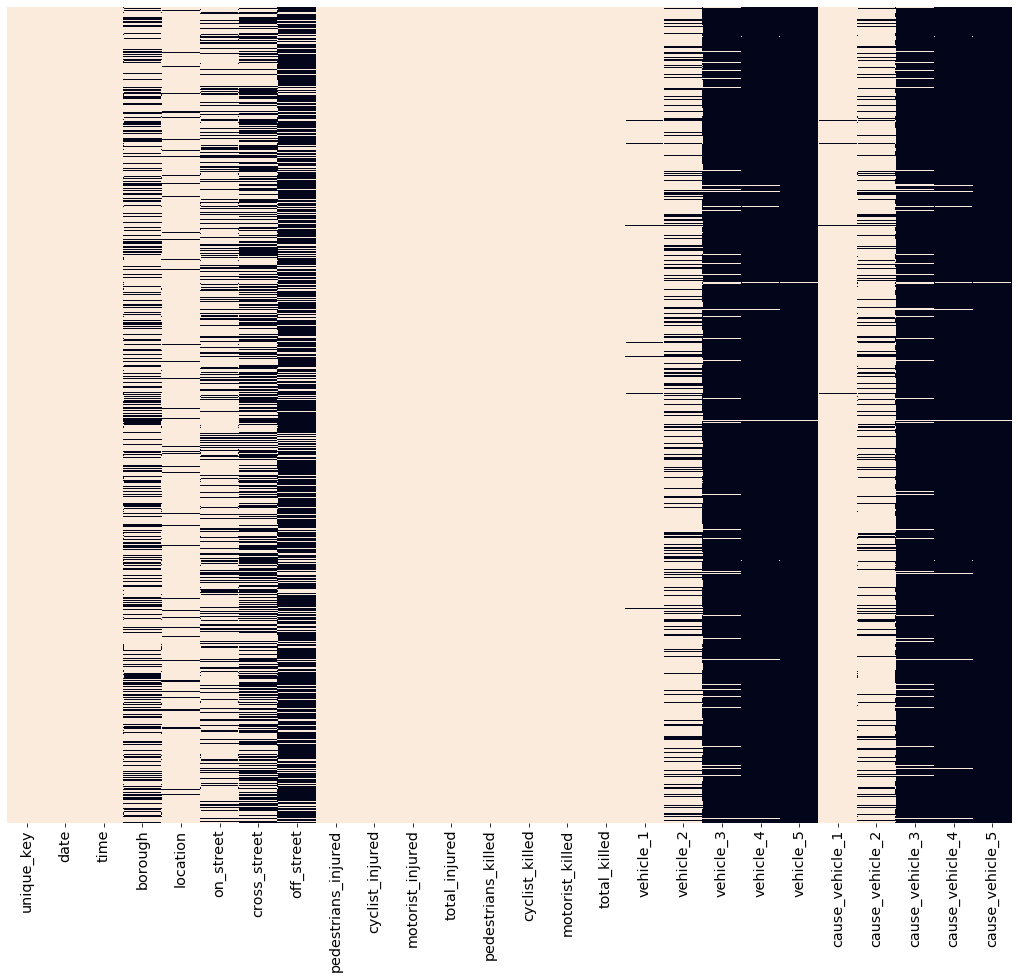

In [103]:
plot_null_matrix(mvc)

我们可以对我们的数据框做出一些直接的解释：

- 前三列几乎没有缺失值。
- 接下来的五列的缺失值分散在各处，每列似乎都有其自己的缺失值密度。
- 接下来的八列是刚刚清理的`injured`和`people_killed`列，仅有一些缺失值。
- 最后10列似乎分为两组，每组5个，每组5个具有相似的 null / non-null值形式。

为了更仔细地检查最后10列中的模式，我们可以使用[dataframe.corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)方法计算两组列之间的相关系数：

`dataframe.corr()`: Compute pairwise correlation of columns, <u>excluding NA/null values</u>.

In [104]:
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]
# 这里计算的是各列缺失与否的关系，而不是值的关系，所以用了.isnull()
missing_corr = mvc[cols_with_missing_vals].isnull().corr()
missing_corr

,borough,location,on_street,cross_street,off_street,total_injured,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
borough,1.000000,0.190105,-0.350190,0.409107,0.362189,-0.002827,0.005582,-0.018325,-0.077516,-0.061932,-0.020406,-0.010733,-0.012115,-0.058596,-0.060542,-0.020158,-0.011348
location,0.190105,1.000000,-0.073975,-0.069719,0.084579,-0.001486,0.015496,-0.010466,-0.033842,-0.000927,0.004655,-0.005797,-0.003458,-0.021373,0.000684,0.004604,-0.004841
on_street,-0.350190,-0.073975,1.000000,0.557767,-0.991030,0.006220,-0.002344,-0.001889,0.119647,0.020867,0.004172,-0.002768,0.001307,0.087374,0.017426,0.002737,-0.003107
cross_street,0.409107,-0.069719,0.557767,1.000000,-0.552763,0.002513,0.004112,-0.017018,0.043799,-0.049910,-0.021137,-0.012003,-0.009102,0.031189,-0.052159,-0.022074,-0.013455
off_street,0.362189,0.084579,-0.991030,-0.552763,1.000000,-0.004266,0.002323,0.001812,-0.121129,-0.022404,-0.004074,0.002492,-0.001738,-0.088187,-0.019120,-0.002580,0.002863
total_injured,-0.002827,-0.001486,0.006220,0.002513,-0.004266,1.000000,-0.000079,0.079840,0.025644,-0.002757,0.002118,0.001073,0.131140,0.030082,-0.002388,0.002188,0.001102
total_killed,0.005582,0.015496,-0.002344,0.004112,0.002323,-0.000079,1.000000,-0.000327,0.008017,0.001057,0.000462,0.000234,-0.000229,0.009888,0.001091,0.000477,0.000240
vehicle_1,-0.018325,-0.010466,-0.001889,-0.017018,0.001812,0.079840,-0.000327,1.000000,0.151516,0.019972,0.008732,0.004425,0.604281,0.180678,0.020624,0.009022,0.004545
vehicle_2,-0.077516,-0.033842,0.119647,0.043799,-0.121129,0.025644,0.008017,0.151516,1.000000,0.131813,0.057631,0.029208,0.106214,0.784402,0.132499,0.058050,0.029264
vehicle_3,-0.061932,-0.000927,0.020867,-0.049910,-0.022404,-0.002757,0.001057,0.019972,0.131813,1.000000,0.437214,0.221585,0.014000,0.106874,0.961316,0.448525,0.225067


相关系数表不够直观，我们可以把它画成图：

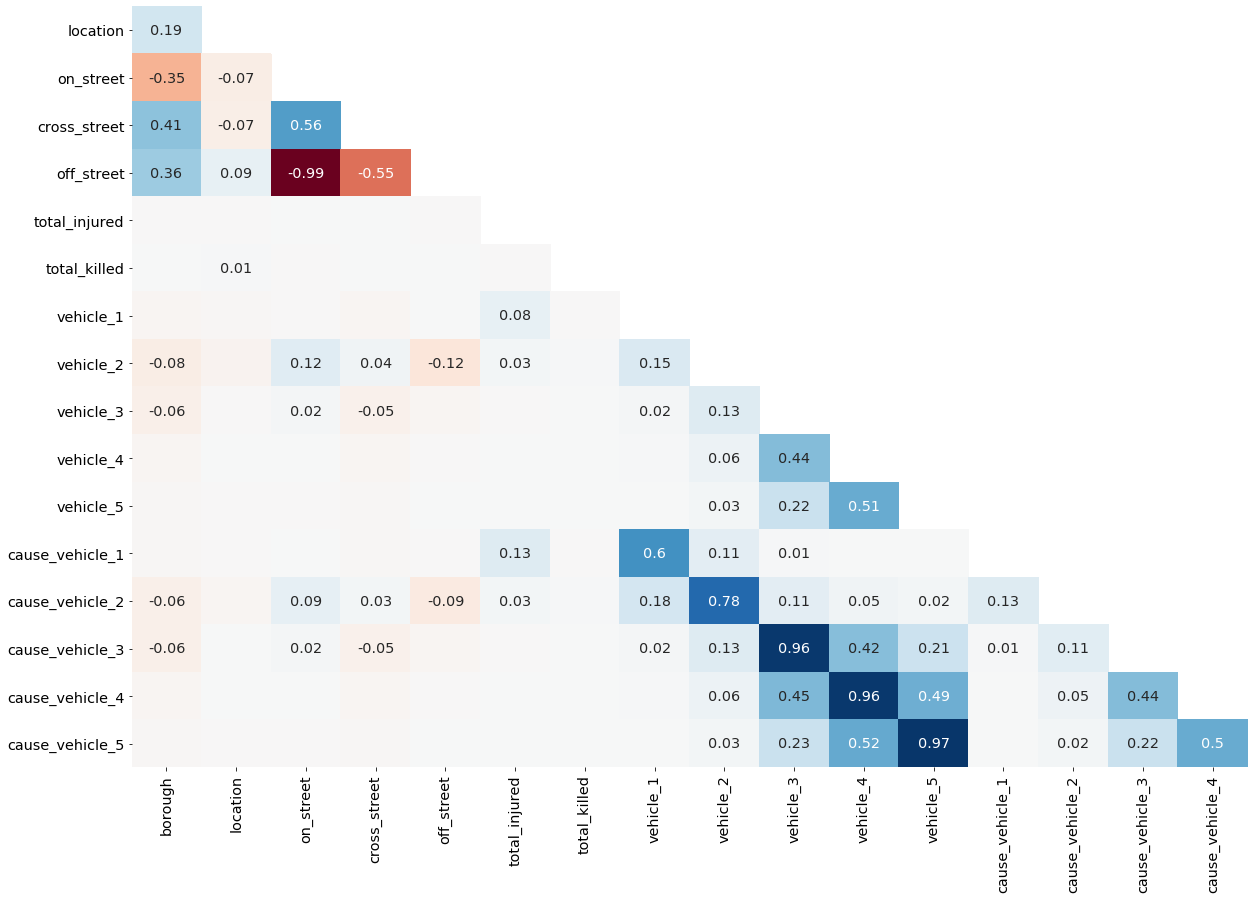

In [105]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
    
plot_null_correlations(mvc[cols_with_missing_vals])

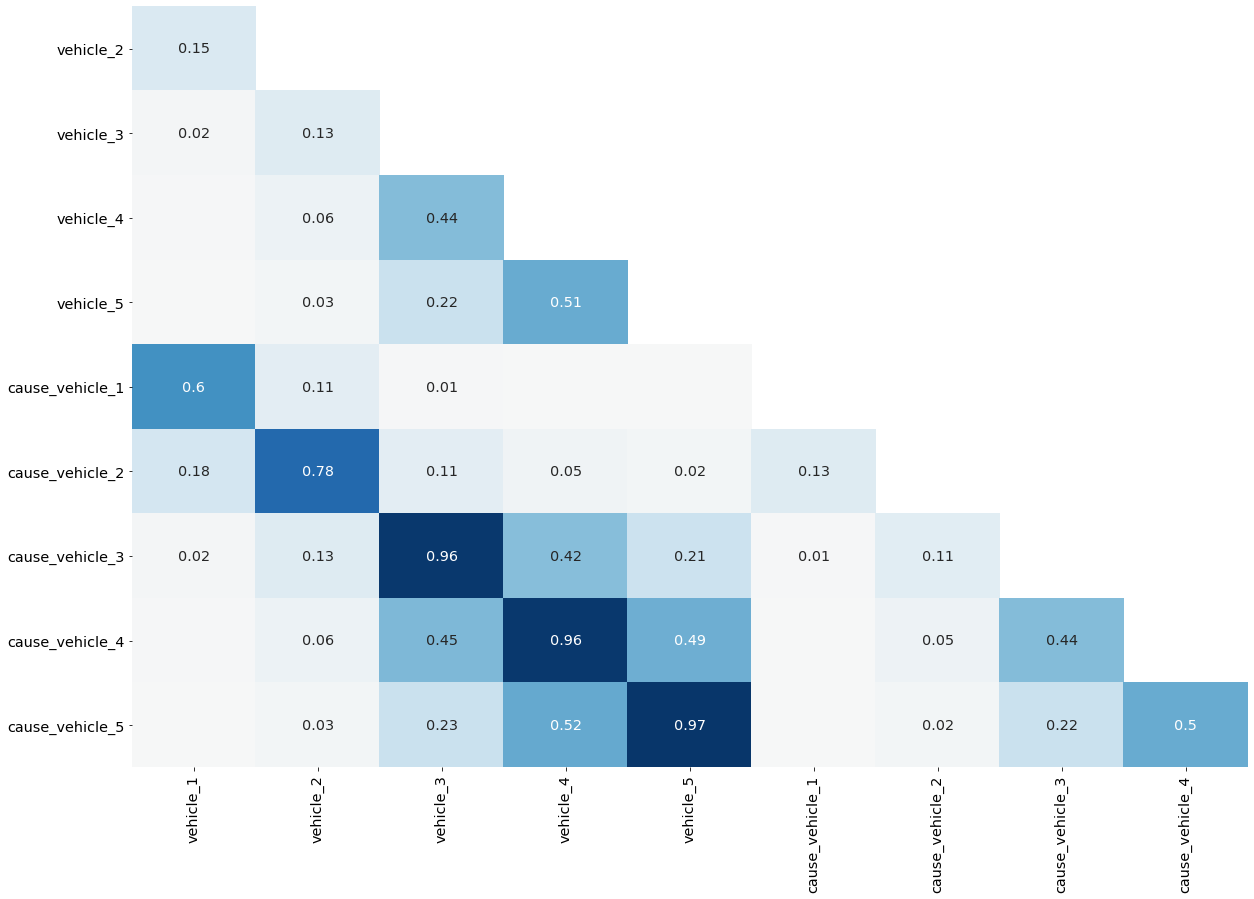

In [106]:
veh_cols = [col for col in mvc.columns if 'vehicle' in col]
plot_null_correlations(mvc[veh_cols])

- ### Analyzing Correlations in Missing Data

可以看出   
`vehicle_1` and `cause_vehicle_1`   
`vehicle_2` and `cause_vehicle_2`   
`vehicle_3` and `cause_vehicle_3`   
`vehicle_4` and `cause_vehicle_4`   
`vehicle_5` and `cause_vehicle_5`   
之间的相关性显著强于其他

If you think about it, this makes sense. When a vehicle is in an accident, there is likely to be a cause, and vice-versa.

让我们探索这五对列中缺失值的变化。 我们将为每对创建一个重要的数据框：
- cause没有缺失，vehicle缺失的数量
- vehicle没有缺失，cause缺失的数量


In [107]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    vc_null_data.append([v, v_null, c_null])
    
vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


- ### Finding the Most Common Values Across Multiple Columns

可以看到，真正的缺失值大约有4500个左右，由于是文本数据，我们可以考虑用common value填充

想要从DataFrame中找到”众数“，可以先用[DataFrame.stack(level=-1, dropna=True)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack)方法把多列堆叠到一列，然后再用`Series.value_counts()`找到common value

In [108]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
vehicles = mvc[v_cols]
vehicles_1d = vehicles.stack()
vehicles_1d.head()

0  vehicle_1                      PASSENGER VEHICLE
1  vehicle_1          SPORT UTILITY / STATION WAGON
   vehicle_2                                     DS
2  vehicle_1    Station Wagon/Sport Utility Vehicle
   vehicle_2                                  Sedan
dtype: object

In [109]:
vehicles_1d.value_counts().head()

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
dtype: int64

In [110]:
c_cols = [c for c in mvc.columns if 'cause_' in c]
causes = mvc[c_cols]
causes_1d = causes.stack()
causes_1d.value_counts().head()

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
dtype: int64

- ### Filling Unknown Values with a Placeholder

1. For values where the vehicle is null and the cause is non-null, set the vehicle to `Unspecified`.
2. For values where the cause is null and the vehicle is not-null, set the cause to `Unspecified`.

In [111]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()
summary_before

,vehicle_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [112]:
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_missing_mask = (mvc[v_col].isnull() & mvc[c_col].notnull())
    c_missing_mask = (mvc[c_col].isnull() & mvc[v_col].notnull())
    mvc[v_col] = mvc[v_col].mask(v_missing_mask, 'Unspecified')
    mvc[c_col] = mvc[c_col].mask(c_missing_mask, 'Unspecified')
    
summary_after = summarize_missing()
summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


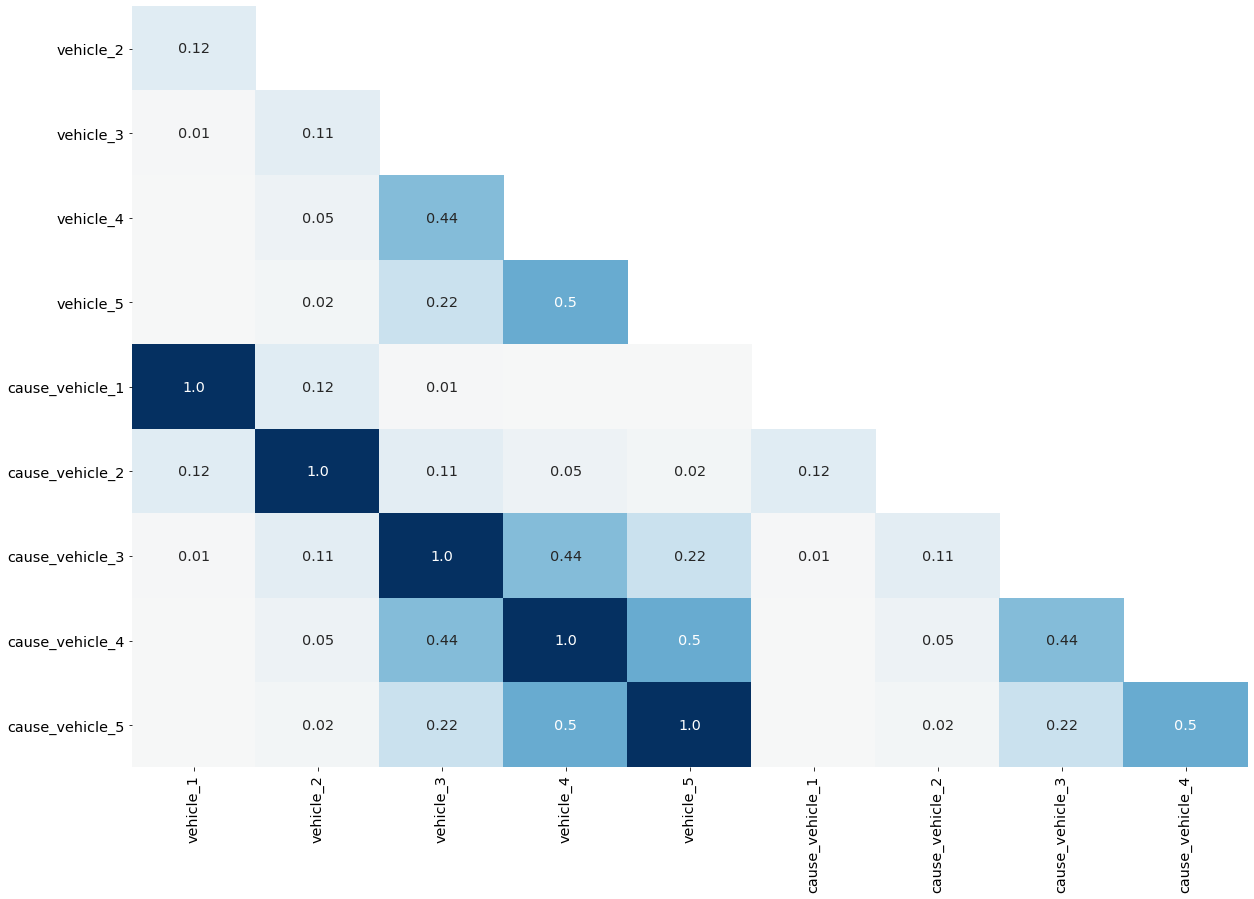

In [113]:
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

- ### Missing Data in the "Location" Columns

现在，我们将焦点转向包含缺失值的最后一组列-与事故发生位置有关的列:

In [114]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
location_data.head()

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
4,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN


In [115]:
location_data.isnull().sum()

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64

这些列有很多缺失的值！ 请记住，所有这五个列都代表同一件事——碰撞的位置。 我们可以潜在地使用non-null值来impute一些null值。

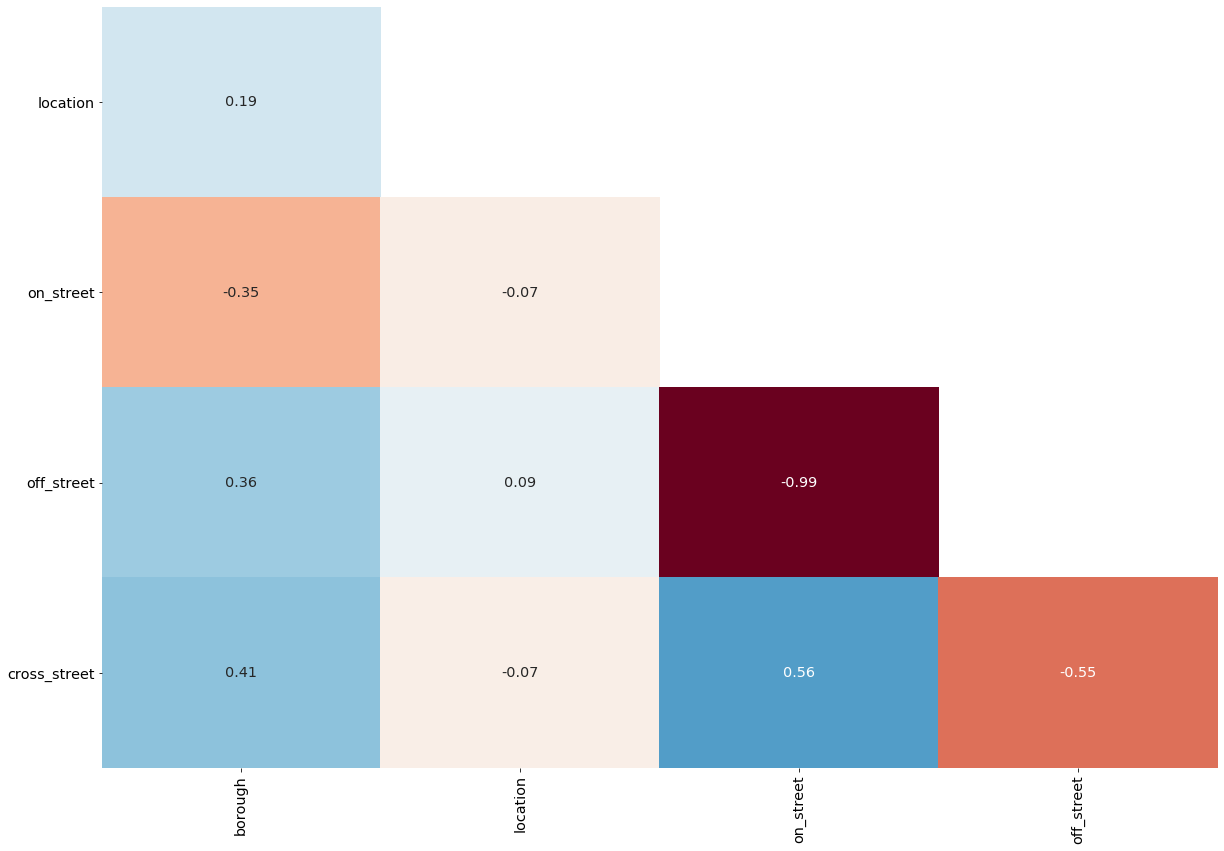

In [116]:
plot_null_correlations(location_data)

除了`off_street` and `on_street`外几乎没有强相关性，这意味着一行某列有缺失值，另一列也许就没有，and vice-versa

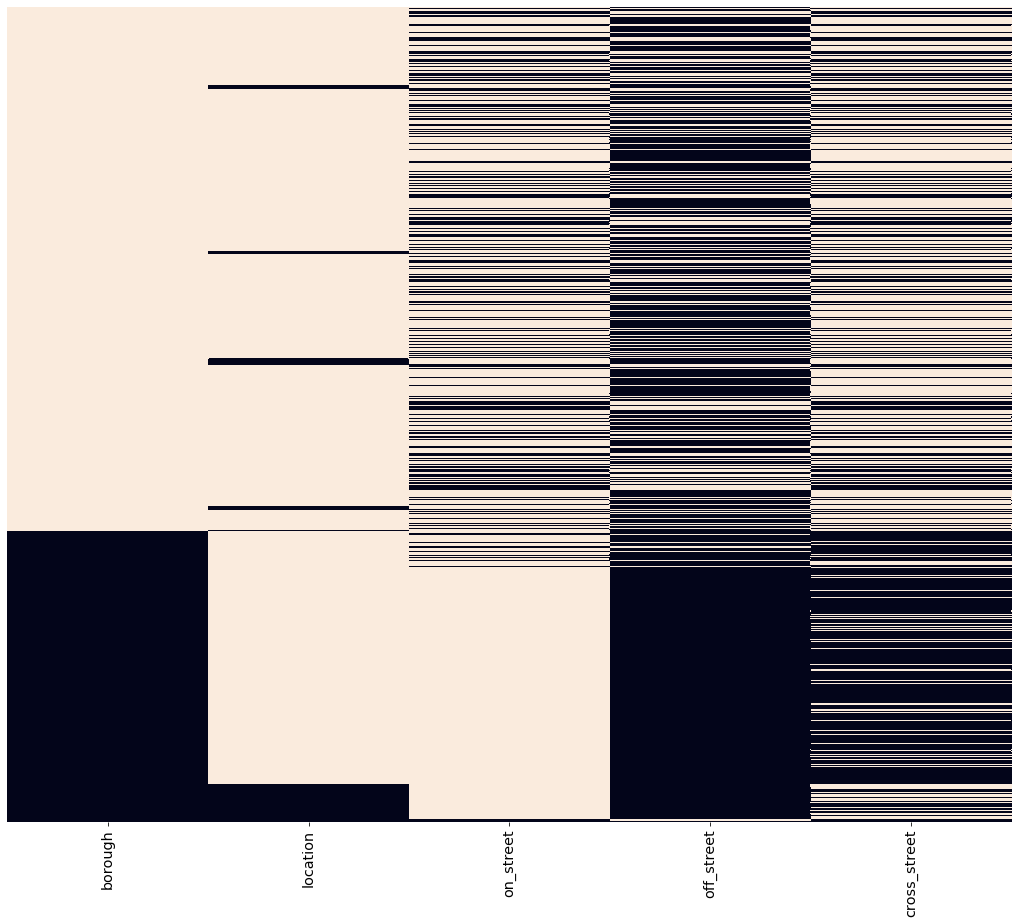

In [119]:
sorted_location_data = location_data.sort_values(loc_cols) # 排序，以便热图效果更直观
plot_null_matrix(sorted_location_data)

观察可以发现：
- `borough`列三分之一缺失，但是这些缺失值在对应的`location`列中是不缺失
- 大约1/10的`location`列的值不缺失，但是缺失的往往在其他列也缺失
- Most rows have a non-null value for either `on_street` or `off_street`, and some also have a value for `cross_street`.

这意味着我们将能够通过使用每行中的其他列来估算很多缺失值。为此，我们可以使用采用地址或位置坐标的地理位置API，并返回有关该位置的信息。

- ### Imputing Location Data

We prepared the supplemental data using the [GeoPy](https://geopy.readthedocs.io/en/latest/) package, which makes working with Geocoding APIs like the Google Maps API easier. Here's the strategy we used to prepare the supplemental data:

- 对于带有`location`列的行，但是缺失 `borough`或street name的列, we used geocoding APIs to look up the `location` coordinates to find the missing data.
- 对于带有street name的行，但 `borough` and/or `location` 缺失的列, we used geocoding APIs to look up the address to find the missing data.

In [120]:
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


补充数据具有原始数据集中的五列-标识每次碰撞的unique_key和五个位置列中的四个。 由于我们使用的地理编码API不包含距任何位置最近的十字路口的数据，因此不包括`cross_street`列。

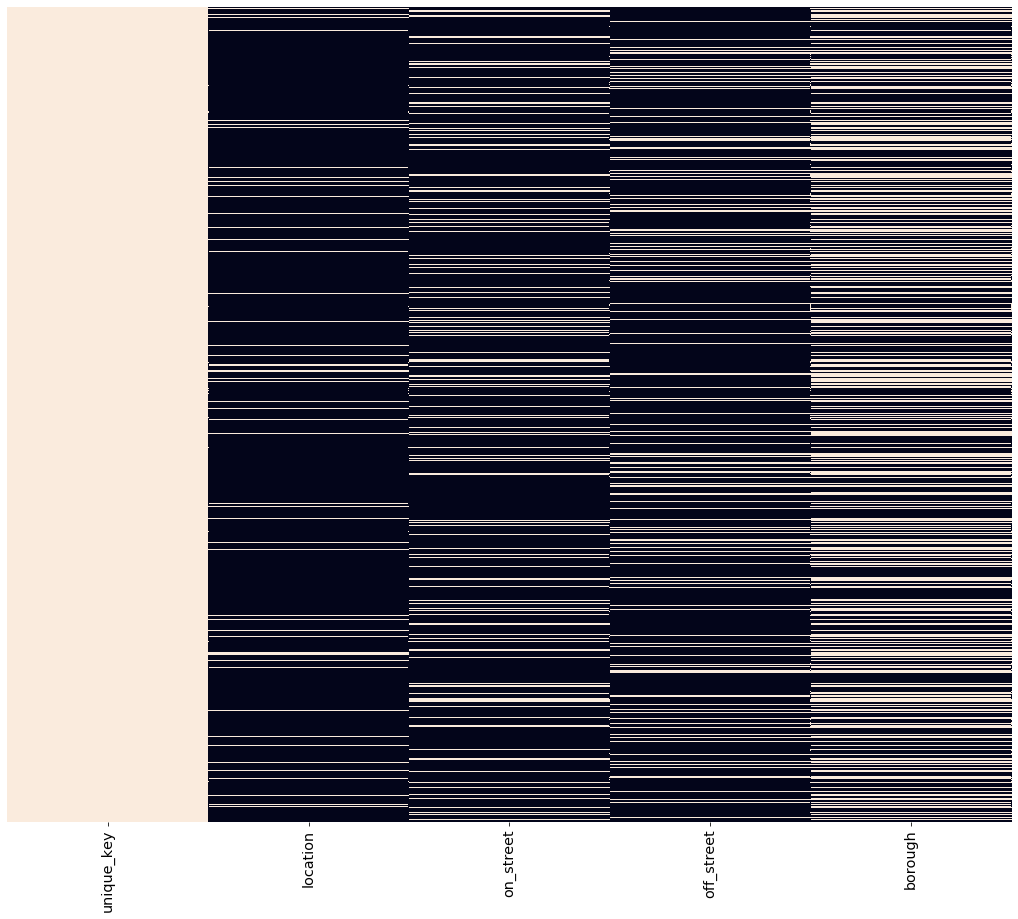

In [121]:
plot_null_matrix(sup_data)

Apart from the `unique_key column`, you'll notice that there are a lot more missing values than our main data set. This makes sense, as we didn't prepare supplemental data where the original data set had non-null values.

如果原始数据和补充数据中的`unique_key`列以相同的顺序具有相同的值，那么我们将能够使用`Series.mask()`将补充数据添加到原始数据中。 

我们可以使用[Series.equals()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.equals.html)方法进行检查：

In [122]:
mvc_keys = mvc['unique_key']
sup_keys = sup_data['unique_key']

mvc_keys.equals(sup_keys)

True

In [123]:
sup_data = pd.read_csv('supplemental_data.csv')

location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()
null_before

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64

In [124]:
for c in location_cols:
    mvc[c] = mvc[c].mask(mvc[c].isnull(), sup_data[c])
    
null_after = mvc[location_cols].isnull().sum()
null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64